# 数据源

In [3]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
iris_dataset = load_iris()
print(type(iris_dataset))
print(iris_dataset['data'].shape)
print(iris_dataset['target'].shape)
iris_dataset1 = iris_dataset['data']
X_train,X_test,y_train,y_test = train_test_split(iris_dataset['data'],iris_dataset['target'],random_state=0)
print(type(X_test))
print(X_test.shape)
print(X_train.shape)

<class 'sklearn.utils.Bunch'>
(150, 4)
(150,)
<class 'numpy.ndarray'>
(38, 4)
(112, 4)


In [6]:
X_train[:5,:]

array([[5.9, 3. , 4.2, 1.5],
       [5.8, 2.6, 4. , 1.2],
       [6.8, 3. , 5.5, 2.1],
       [4.7, 3.2, 1.3, 0.2],
       [6.9, 3.1, 5.1, 2.3]])

In [21]:
y_train[:5]

array([1, 1, 2, 0, 2])

# 特征选择
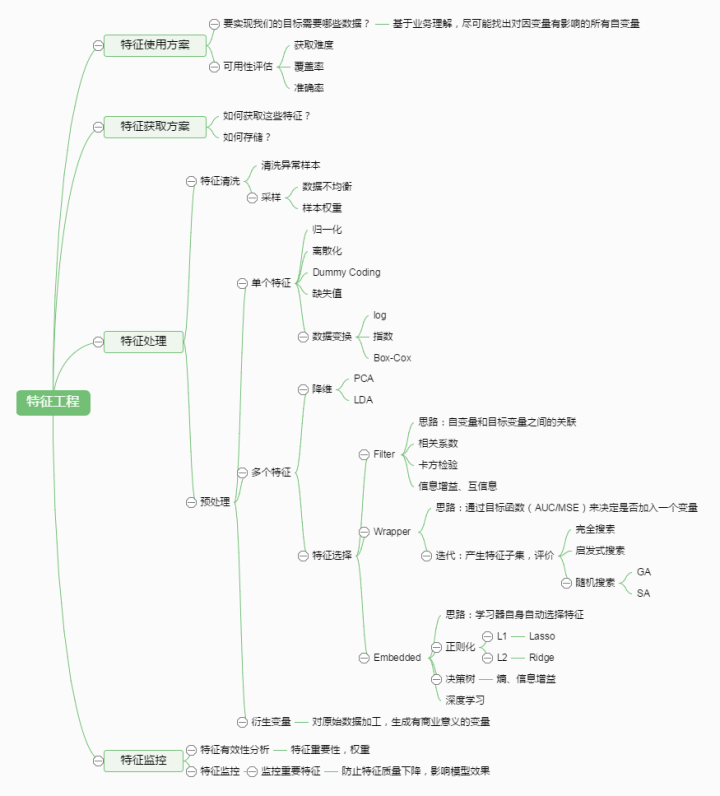

**通常来说，从两个方面考虑来选择特征：**
- 特征是否发散：如果一个特征不发散，例如方差接近于0，也就是说样本在这个特征上基本上没有差异，这个特征对于样本的区分并没有什么用。
- 特征与目标的相关性：这点比较显见，与目标相关性高的特征，应当优选选择。除方差法外，本文介绍的其他方法均从相关性考虑。

**根据特征选择的形式又可以将特征选择方法分为3种：**
- Filter：过滤法，按照发散性或者相关性对各个特征进行评分，设定阈值或者待选择阈值的个数，选择特征。
- Wrapper：包装法，根据目标函数（通常是预测效果评分），每次选择若干特征，或者排除若干特征。
- Embedded：嵌入法，先使用某些机器学习的算法和模型进行训练，得到各个特征的权值系数，根据系数从大到小选择特征。类似于Filter方法，但是是通过训练来确定特征的优劣。

## 数据预处理
### 区间缩放法：纵向
### 归一化：横向
### 标准化：纵向
标准化是依照特征矩阵的列处理数据，其通过求z-score的方法，将样本的特征值转换到同一量纲下。归一化是依照特征矩阵的行处理数据，其目的在于样本向量在点乘运算或其他核函数计算相似性时，拥有统一的标准，也就是说都转化为“单位向量”。

In [76]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
A = MinMaxScaler().fit_transform(X_train[:5,:])
B = Normalizer().fit_transform(X_train[:5,:])
C = StandardScaler().fit_transform(X_train[:5,:])
print(A)
print("*"*55)
print(B)
print("*"*55)
print(C)

[[0.54545455 0.66666667 0.69047619 0.61904762]
 [0.5        0.         0.64285714 0.47619048]
 [0.95454545 0.66666667 1.         0.9047619 ]
 [0.         1.         0.         0.        ]
 [1.         0.83333333 0.9047619  1.        ]]
*******************************************************
[[0.73923462 0.37588201 0.52623481 0.187941  ]
 [0.76262994 0.34186859 0.52595168 0.1577855 ]
 [0.71718148 0.31640359 0.58007326 0.22148252]
 [0.80533308 0.54831188 0.2227517  0.03426949]
 [0.73337886 0.32948905 0.54206264 0.24445962]]
*******************************************************
[[-0.15028204  0.09805807  0.12254259  0.05372153]
 [-0.27551708 -1.86310328 -0.01361584 -0.34918995]
 [ 0.97683328  0.09805807  1.00757237  0.85954449]
 [-1.65310248  1.07863874 -1.85175462 -1.69222822]
 [ 1.10206832  0.58834841  0.73525551  1.12815215]]


In [18]:
import numpy as np
5.9/(np.sqrt(np.sum([5.9**2 , 3**2 , 4.2**2 ,1.5**2])))

0.7392346162730675

### 哑编码与独热编码

In [78]:
from sklearn.preprocessing import Binarizer
A = np.array([[1,2,3,1,2,1],[2,1,3,2,1,3]])
Binarizer(threshold=1).fit_transform(A)

array([[0, 1, 1, 0, 1, 0],
       [1, 0, 1, 1, 0, 1]])

In [87]:
from sklearn.preprocessing import OneHotEncoder
est = OneHotEncoder()
est.fit(A)
print("1:",est.transform([[1,2,3,2,1,1]]).toarray())
##########################################
est = OneHotEncoder(sparse = False)
est.fit(A)
print("2:",est.transform([[1,2,3,2,1,1]]))

1: [[1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.]]
2: [[1. 0. 0. 1. 1. 0. 1. 1. 0. 1. 0.]]


## Filter

### 方差选择法
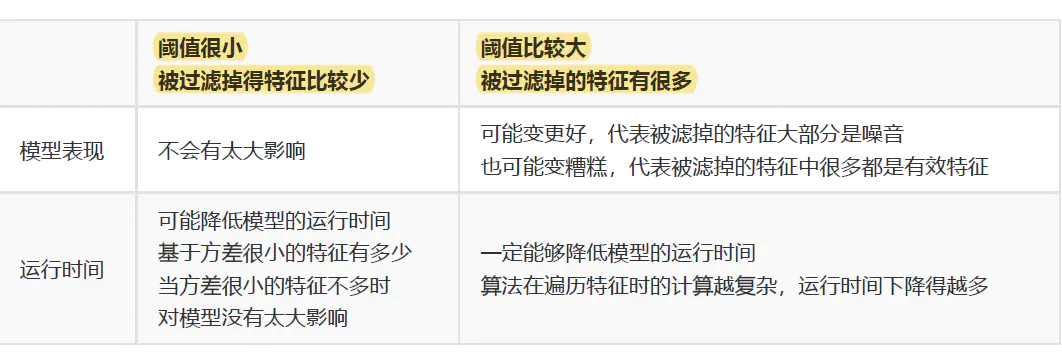

In [102]:
iris_dataset.data[0:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [112]:
from sklearn.feature_selection import VarianceThreshold
#方差选择法，返回值为特征选择后的数据
#参数threshold为方差的阈值
#VarianceThreshold(threshold=0.5).fit_transform(iris_dataset.data)
selector = VarianceThreshold(threshold=0.5).fit(iris_dataset.data)
print(selector)

VarianceThreshold(threshold=0.5)


In [110]:
data = selector.transform(iris_dataset.data)
print(data[0:5])
print(selector.variances_)

[[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]]
[0.68112222 0.18871289 3.09550267 0.57713289]


### SelectKBest

卡方检验:自变量对因变量的相关性

In [144]:
from sklearn.feature_selection import SelectKBest,chi2,f_regression,f_classif,mutual_info_regression
from scipy.stats import pearsonr

#选择K个最好的特征，返回选择特征后的数据
#参数K为选择的特征个数
selector = SelectKBest(chi2,k=2)
selector.fit(iris_dataset.data,iris_dataset.target)
print("scores_:",selector.scores_)
print("pvalues_:",selector.pvalues_)
print("selected index:",selector.get_support(True))

scores_: [ 10.81782088   3.7107283  116.31261309  67.0483602 ]
pvalues_: [4.47651499e-03 1.56395980e-01 5.53397228e-26 2.75824965e-15]
selected index: [2 3]


In [137]:
selector=SelectKBest(score_func=f_classif,k=3)
selector.fit(iris_dataset.data,iris_dataset.target)
print("scores_:",selector.scores_)
print("pvalues_:",selector.pvalues_)
print("selected index:",selector.get_support(True))
print("after transform:",selector.transform(iris_dataset.data)[0:5])

scores_: [ 119.26450218   49.16004009 1180.16118225  960.0071468 ]
pvalues_: [1.66966919e-31 4.49201713e-17 2.85677661e-91 4.16944584e-85]
selected index: [0 2 3]
after transform: [[5.1 1.4 0.2]
 [4.9 1.4 0.2]
 [4.7 1.3 0.2]
 [4.6 1.5 0.2]
 [5.  1.4 0.2]]


## Wrapper

### 递归特征消除（Recursive Feature Elimination）
递归特征消除法使用一个基模型来进行多轮训练，每轮训练后，消除若干权值系数的特征，再基于新的特征集进行下一轮训练。

RFE的稳定性很大程度上取决于迭代时，底层用的哪种模型。比如RFE采用的是普通的回归（LR），没有经过正则化的回归是不稳定的，那么RFE就是不稳定的。假如采用的是Lasso/Ridge，正则化的回归是稳定的，那么RFE就是稳定的。

使用feature_selection库的RFE类来选择特征的代码如下：

In [25]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression,Ridge,Lasso

# 这里的算法可以换成其他
# lr = LinearRegression()
# 这里一开始选择的是不带正则化的LR
# 但是如果RFE采用的底层模型不稳定的话，RFE就是不稳定的

#递归特征消除法，返回特征选择后的数据
#参数estimator为基模型
#参数n_features_to_select为选择的特征个数
lr = Ridge(alpha=100000, fit_intercept=True, normalize=True,
           copy_X=True, max_iter=1500, tol=1e-4, solver='auto')
rfe = RFE(estimator=lr, n_features_to_select=2)
rfe.fit_transform(iris_dataset.data, iris_dataset.target)
# 和传参对应，所选择的属性的个数
print(rfe.n_features_)
# 打印的是相应位置上属性的排名
print(rfe.ranking_)
# 属性选择的一种模糊表示，选择的是true，未选择的是false
print(rfe.support_)
# 第ℹ️个特征的排名
print(rfe.ranking_[0])
# 外部估计函数的相关信息
print(rfe.estimator_)

2
[2 1 3 1]
[False  True False  True]
2
Ridge(alpha=100000, max_iter=1500, normalize=True, tol=0.0001)


In [27]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold

rfr = RandomForestRegressor()

rfecv = RFECV(estimator=rfr, cv=KFold(n_splits=2,shuffle=True, random_state=1), scoring='neg_mean_squared_error')
rfecv.fit(iris_dataset.data, iris_dataset.target)
print(rfecv.n_features_)
print(rfecv.ranking_)

3
[2 1 1 1]


## Embedded

### 基于惩罚项的特征选择方法

In [5]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression
 
#带L1惩罚项的逻辑回归作为基模型的特征选择
SelectFromModel(LogisticRegression(penalty="l2", C=0.1)).fit_transform(iris_dataset.data, iris_dataset.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

### 基于树模型的特征选择法
#### GBDT
主要是通过计算特征i在单棵树中重要度的平均值，
其中，特征i在单棵树的重要度主要是通过计算按这个特征i分裂之后损失的减少值

树模型中GBDT也可用来作为基模型进行特征选择，使用feature_selection库的SelectFromModel类结合GBDT模型，来选择特征的代码如下：

In [7]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import GradientBoostingClassifier
 
#GBDT作为基模型的特征选择
SelectFromModel(GradientBoostingClassifier()).fit_transform(iris_dataset.data, iris_dataset.target)

array([[1.4, 0.2],
       [1.4, 0.2],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.7, 0.4],
       [1.4, 0.3],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.5, 0.1],
       [1.5, 0.2],
       [1.6, 0.2],
       [1.4, 0.1],
       [1.1, 0.1],
       [1.2, 0.2],
       [1.5, 0.4],
       [1.3, 0.4],
       [1.4, 0.3],
       [1.7, 0.3],
       [1.5, 0.3],
       [1.7, 0.2],
       [1.5, 0.4],
       [1. , 0.2],
       [1.7, 0.5],
       [1.9, 0.2],
       [1.6, 0.2],
       [1.6, 0.4],
       [1.5, 0.2],
       [1.4, 0.2],
       [1.6, 0.2],
       [1.6, 0.2],
       [1.5, 0.4],
       [1.5, 0.1],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.2, 0.2],
       [1.3, 0.2],
       [1.4, 0.1],
       [1.3, 0.2],
       [1.5, 0.2],
       [1.3, 0.3],
       [1.3, 0.3],
       [1.3, 0.2],
       [1.6, 0.6],
       [1.9, 0.4],
       [1.4, 0.3],
       [1.6, 0.2],
       [1.4, 0.2],
       [1.5, 0.2],
       [1.4, 0.2],
       [4.7, 1.4],
       [4.5, 1.5],
       [4.9,

#### xgboost
XGboost是通过该特征每棵树中分裂次数的和去计算的，比如这个特征在第一棵树分裂1次，第二棵树2次……，那么这个特征的得分就是(1+2+...)。

[('booster', 'gbtree'), ('objective', 'multi:softmax'), ('num_class', 3), ('gamma', 0.1), ('max_depth', 6), ('lambda', 2), ('subsample', 0.7), ('colsample_bytree', 0.7), ('min_child_weight', 3), ('slient', 1), ('eta', 0.1), ('seed', 1000), ('nthread', 4)]
[15:25:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:573: 
Parameters: { "slient" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[15:25:27] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softmax' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
accuarcy:93.33%


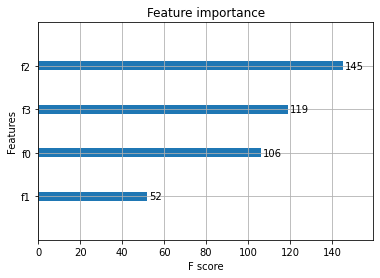

In [13]:
from sklearn.datasets import load_iris
import xgboost as xgb
from xgboost import plot_importance
import matplotlib.pyplot  as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score  # 准确率
 
# 记载样本数据集
iris = load_iris()
X,y = iris.data,iris.target
# 数据集分割
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=123457)
 
# 算法参数
params = {
    'booster':'gbtree',
    'objective':'multi:softmax',
    'num_class':3,
    'gamma':0.1,
    'max_depth':6,
    'lambda':2,
    'subsample':0.7,
    'colsample_bytree':0.7,
    'min_child_weight':3,
    'slient':1,
    'eta':0.1,
    'seed':1000,
    'nthread':4,
}
 
plst = list(params.items())
print(plst)
 
# 生成数据集格式
dtrain = xgb.DMatrix(X_train,y_train)
num_rounds = 500
# xgboost模型训练
model = xgb.train(plst,dtrain,num_rounds)
 
# 对测试集进行预测
dtest = xgb.DMatrix(X_test)
y_pred = model.predict(dtest)
 
# 计算准确率
accuracy = accuracy_score(y_test,y_pred)
print('accuarcy:%.2f%%'%(accuracy*100))
 
# 显示重要特征
plot_importance(model)
plt.show()


#### 随机森林
用袋外数据 (OOB) 做预测。随机森林在每次重抽样建立决策树时，都会有一些样本没有被选中，那么就可以用这些样本去做交叉验证，这也是随机森林的优点之一。它可以不用做交叉验证，直接用oob _score_去对模型性能进行评估。

随机森林在构建每棵树时，会对训练集使用不同的bootstrap sample（随机且有放回地抽取）。

对于每棵树而言（假设对于第k棵树），大约有一半的训练实例没有参与第k棵树的生成，这一半的数据就称为第k棵树的袋外数据样本。
    具体的方法就是：
1. 对于每一棵决策树，用OOB 计算袋外数据误差，记为 errOOB1；
2. 然后随机对OOB所有样本的特征i加入噪声干扰，再次计算袋外数据误差，记为errOOB2；
3. 假设有N棵树，特征i的重要性为sum(errOOB2-errOOB1)/N;

    如果加入随机噪声后，袋外数据准确率大幅下降，说明这个特征对预测结果有很大的影响，进而说明它的重要程度比较高

In [12]:
from sklearn import ensemble
grd = ensemble.RandomForestClassifier(n_estimators=30)
grd.fit(X_train,y_train)
grd.feature_importances_


array([0.09111263, 0.02701495, 0.47433179, 0.40754063])

## 降维
当特征选择完成后，可以直接训练模型了，但是可能由于特征矩阵过大，导致计算量大，训练时间长的问题，因此降低特征矩阵维度也是必不可少的。常见的降维方法除了以上提到的基于L1惩罚项的模型以外，另外还有主成分分析法（PCA）和线性判别分析（LDA），线性判别分析本身也是一个分类模型。PCA和LDA有很多的相似点，其本质是要将原始的样本映射到维度更低的样本空间中，但是PCA和LDA的映射目标不一样：PCA是为了让映射后的样本具有最大的发散性；而LDA是为了让映射后的样本有最好的分类性能。所以说PCA是一种无监督的降维方法，而LDA是一种有监督的降维方法。

### 主成分分析法（PCA）

In [13]:
from sklearn.decomposition import PCA
 
#主成分分析法，返回降维后的数据
#参数n_components为主成分数目
PCA(n_components=2).fit_transform(iris_dataset.data)

array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

### 线性判别分析方法（LDA）

In [16]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
 
#线性判别分析法，返回降维后的数据
#参数n_components为降维后的维数
LDA(n_components=2).fit_transform(iris_dataset.data, iris_dataset.target)


array([[ 8.06179978e+00,  3.00420621e-01],
       [ 7.12868772e+00, -7.86660426e-01],
       [ 7.48982797e+00, -2.65384488e-01],
       [ 6.81320057e+00, -6.70631068e-01],
       [ 8.13230933e+00,  5.14462530e-01],
       [ 7.70194674e+00,  1.46172097e+00],
       [ 7.21261762e+00,  3.55836209e-01],
       [ 7.60529355e+00, -1.16338380e-02],
       [ 6.56055159e+00, -1.01516362e+00],
       [ 7.34305989e+00, -9.47319209e-01],
       [ 8.39738652e+00,  6.47363392e-01],
       [ 7.21929685e+00, -1.09646389e-01],
       [ 7.32679599e+00, -1.07298943e+00],
       [ 7.57247066e+00, -8.05464137e-01],
       [ 9.84984300e+00,  1.58593698e+00],
       [ 9.15823890e+00,  2.73759647e+00],
       [ 8.58243141e+00,  1.83448945e+00],
       [ 7.78075375e+00,  5.84339407e-01],
       [ 8.07835876e+00,  9.68580703e-01],
       [ 8.02097451e+00,  1.14050366e+00],
       [ 7.49680227e+00, -1.88377220e-01],
       [ 7.58648117e+00,  1.20797032e+00],
       [ 8.68104293e+00,  8.77590154e-01],
       [ 6.

## 总结
再让我们回归一下本文开始的特征工程的思维导图，我们可以使用sklearn完成几乎所有特征处理的工作，而且不管是数据预处理，还是特征选择，抑或降维，它们都是通过某个类的方法fit_transform完成的，fit_transform要不只带一个参数：特征矩阵，要不带两个参数：特征矩阵加目标向量。这些难道都是巧合吗？还是故意设计成这样？方法fit_transform中有fit这一单词，它和训练模型的fit方法有关联吗？